In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


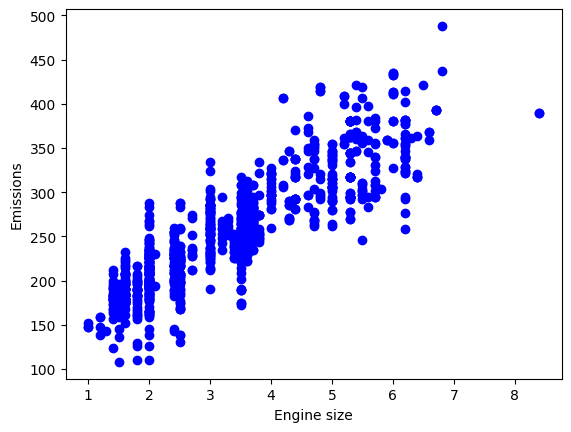

In [6]:
plt.scatter(cdf[['ENGINESIZE']],cdf[['CO2EMISSIONS']],color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()

In [7]:
#splitting the data
mask=np.random.rand(len(df))<0.8
train=cdf[mask]
test=cdf[~mask]


In [16]:
#polynomialfeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [17]:
clf=linear_model.LinearRegression()
train_y=clf.fit(train_x_poly,train_y)
#printing the coefficients
print("Intercept is: ",clf.intercept_)
print("Coefficients are: ",clf.coef_)

Intercept is:  [106.71773788]
Coefficients are:  [[ 0.         51.50230034 -1.71077455]]


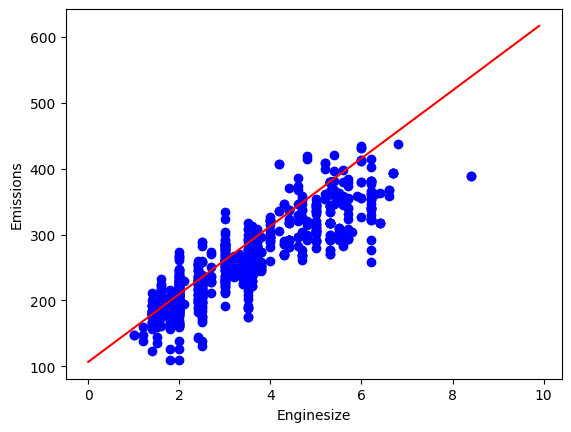

In [24]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
x_axis=np.arange(0.0,10.0,0.1)
y_axis=clf.intercept_[0]+clf.coef_[0][1]*x_axis+clf.coef_[0][0]*np.power(x_axis,2);
plt.plot(x_axis,y_axis,'-r')
plt.xlabel('Enginesize')
plt.ylabel('Emissions')
plt.show()

In [31]:
#Evaluation
from sklearn import metrics
test_x_poly=poly.transform(test_x)
predicted=clf.predict(test_x_poly)

#printing the errors
print('Mean Absolute error: ',np.mean(np.absolute(predicted-test_y)))
print("Mean Squared Error: ",np.mean((test_y-predicted)**2))
print('R2_score: ',metrics.r2_score(test_y,predicted))

Mean Absolute error:  23.933295365565094
Mean Squared Error:  1053.4146239199845
R2_score:  0.7473576551414088


In [36]:
#Now trying with degree 3
poly=PolynomialFeatures(degree=3)
train_x_poly=poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [37]:
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

In [38]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_y=regr.fit(train_x_poly,train_y)

#printing the coefficients
print("Intercept: ",regr.intercept_)
print("Coefficient: ",regr.coef_)

Intercept:  [130.85686109]
Coefficient:  [[ 0.         29.04006458  4.41415337 -0.50357884]]


In [40]:
#Predicting the values
test_x_poly=poly.fit_transform(test_x)
predicted=regr.predict(test_x_poly)

#The Errors
print("Mean Absolute error: ",np.mean(np.absolute(predicted-test_y)))
print("Mean Squared Error: ",np.mean((predicted-test_y)**2))
print("R2_score: ",metrics.r2_score(test_y,predicted))

Mean Absolute error:  23.944694686157362
Mean Squared Error:  1052.3750392188613
R2_score:  0.7476069806307337
